# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 11 (Thursday) 11:00 pm </b> </font>

<font color="blue"> Soham Devdatta Dhodapkar </font>

# I. Introduction
Classification is a problem in which we predict which class a data belongs to.
In this classification assignment, we are implementing classification models.
There are 4 of them :<br>
1) Pocket Algorithm <br>
2) Quadratic Discriminant Analysis (QDA)<br>
3) Linear Discrimininat Analysis (LDA)<br>
4) Logistic Regression<br>
After writing the code, it is implemented on the dataset and evaluation metrics are applied and comparison and analysis is done.

# II. Data

SOURCE : https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Also available on Kaggle, it has been given on both the data repositories that this dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
Features of the data,there are 25 variables:
As given on Kaggle,

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)


Importing all the required libraries, also setting up auto-complete feature.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
%matplotlib inline
%config IPCompleter.greedy=True

Next, we will load our dataset into a variable 'df' and display it, with its shape.

In [2]:
df = pd.read_csv("creddef.csv")
df.shape
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [57]:
df = df.rename(columns={'default.payment.next.month': 'default_pay', 'PAY_0': 'PAY_1'})

In the above line, we renamed some columns for our convention

Checking for null values,

In [58]:
df.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We will describe our data to see which attributes have what features. 

In [59]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Describing the general details of each column,

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID             30000 non-null int64
LIMIT_BAL      30000 non-null float64
SEX            30000 non-null int64
EDUCATION      30000 non-null int64
MARRIAGE       30000 non-null int64
AGE            30000 non-null int64
PAY_1          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
PAY_4          30000 non-null int64
PAY_5          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null float64
BILL_AMT2      30000 non-null float64
BILL_AMT3      30000 non-null float64
BILL_AMT4      30000 non-null float64
BILL_AMT5      30000 non-null float64
BILL_AMT6      30000 non-null float64
PAY_AMT1       30000 non-null float64
PAY_AMT2       30000 non-null float64
PAY_AMT3       30000 non-null float64
PAY_AMT4       30000 non-null float64
PAY_AMT5       30000 non-null float64
PAY_AMT6       30000 non-null float64
d

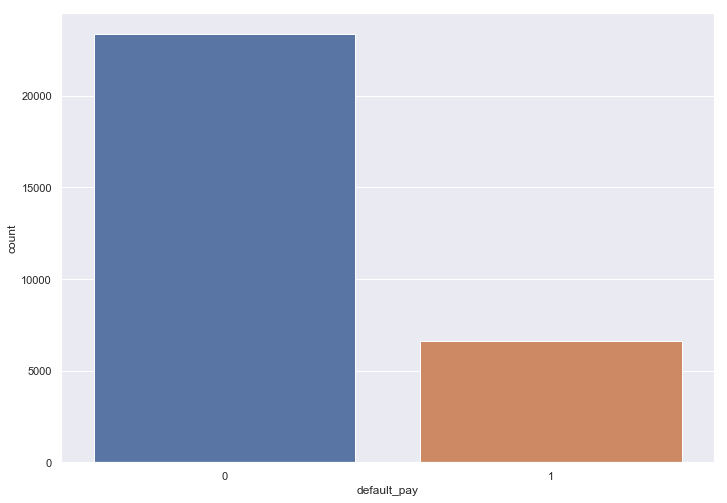

In [61]:
sns.countplot(x='default_pay',data=df)

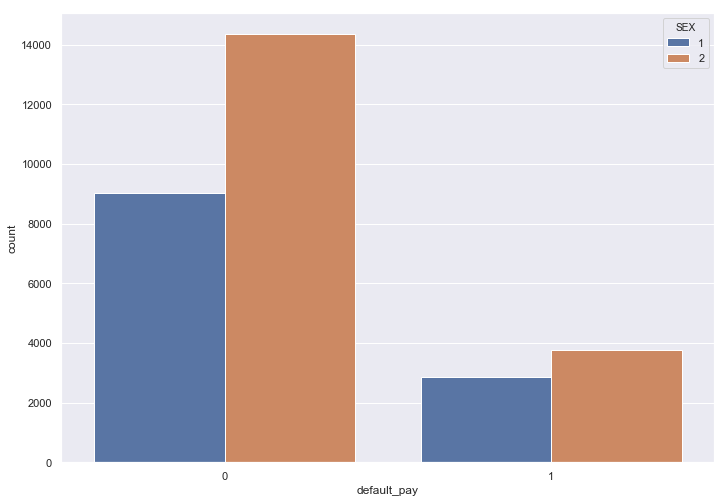

In [62]:
sns.countplot(x='default_pay',hue='SEX',data=df)

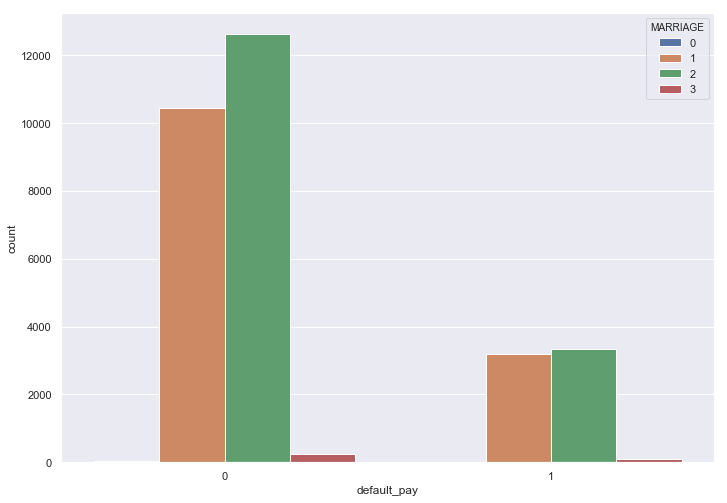

In [63]:
sns.countplot(x='default_pay',hue='MARRIAGE',data=df)

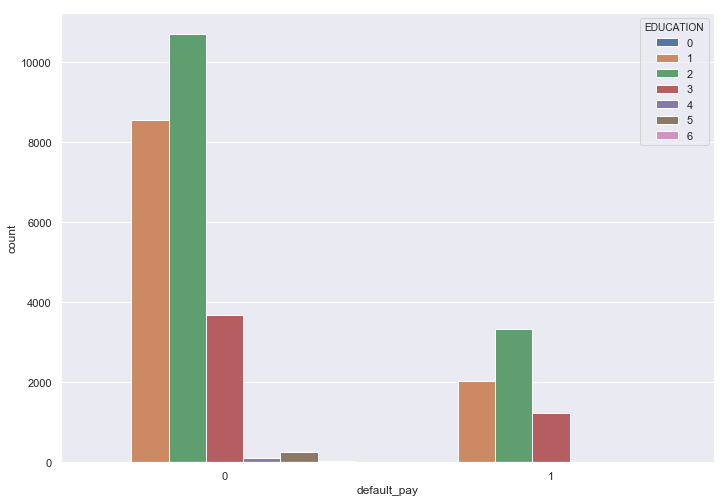

In [64]:
sns.countplot(x='default_pay',hue='EDUCATION',data=df)

We are creating a cross matrix for the two columns age and education.


In [65]:
pd.crosstab(df["AGE"],df["EDUCATION"],margins=True)

EDUCATION,0,1,2,3,4,5,6,All
AGE,,,,,,,,
21,0,7,53,4,0,2,1,67
22,0,120,354,77,2,6,1,560
23,0,264,536,115,3,13,0,931
24,0,329,667,119,4,8,0,1127
25,0,406,663,100,7,9,1,1186
26,0,466,633,140,9,8,0,1256
27,0,665,653,133,6,18,2,1477
28,1,657,595,137,9,9,1,1409
29,0,784,677,124,9,10,1,1605


In [66]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [67]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [68]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [69]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

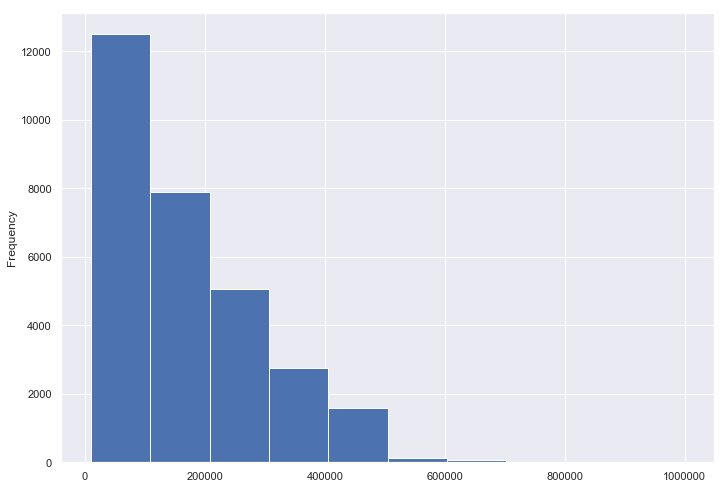

In [70]:
df.LIMIT_BAL.plot.hist()

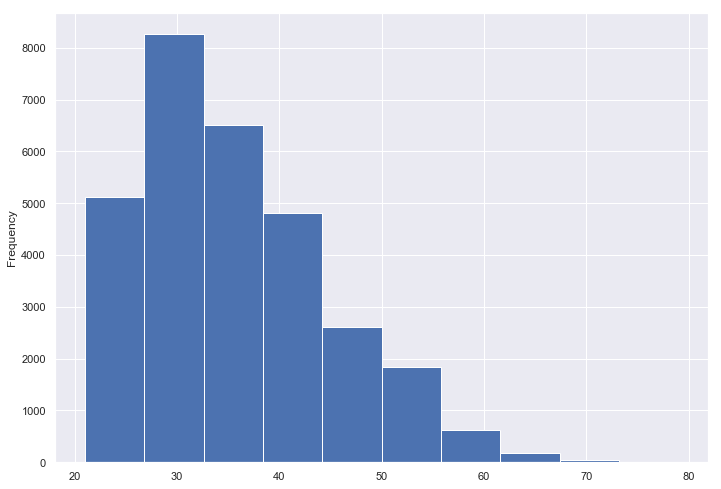

In [71]:
df.AGE.plot.hist()

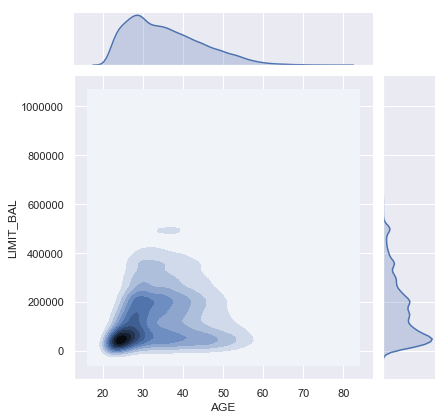

In [72]:

sns.jointplot("AGE", 'LIMIT_BAL', data=df, kind='kde');

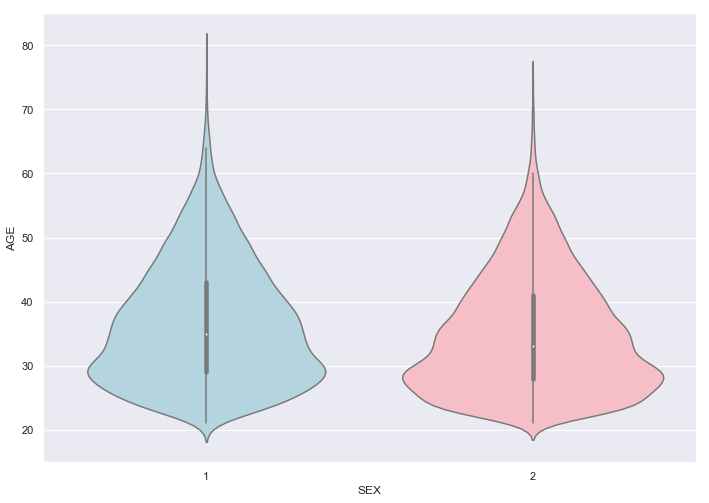

In [73]:
sns.violinplot("SEX", "AGE", data=df,
               palette=["lightblue", "lightpink"]);

In [3]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


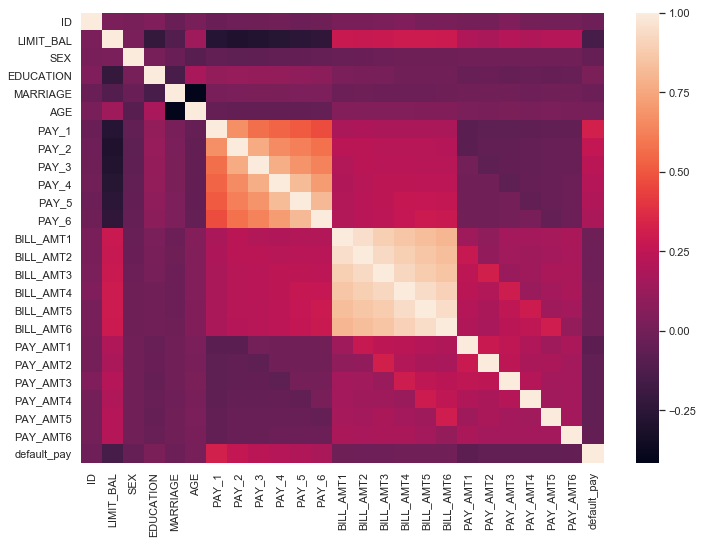

In [74]:
sns.heatmap(df.corr())

In [75]:
dcat = df.default_pay

In [76]:
grp = df.groupby(['default_pay'])
grp.size()

default_pay
0    23364
1     6636
dtype: int64

In [77]:
prob = df.default_pay.sum() / len(df.default_pay)
print(prob)

0.2212


In [78]:
edu = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[edu, 'EDUCATION'] = 4
df.EDUCATION.value_counts()


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [79]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [80]:
pd.crosstab(df.SEX,df.default_pay)

default_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


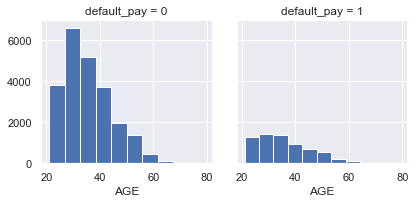

In [82]:
g = sns.FacetGrid(df, col = 'default_pay')
g.map(mpl.hist, 'AGE')

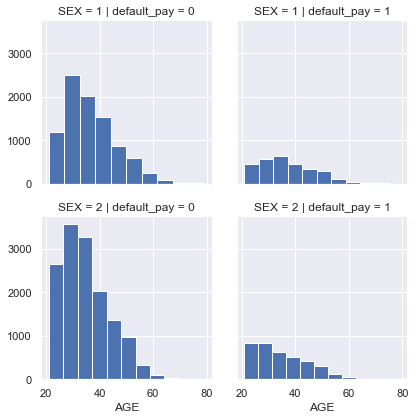

In [83]:
g = sns.FacetGrid(df, col = 'default_pay', row = 'SEX')
g.map(mpl.hist, 'AGE')

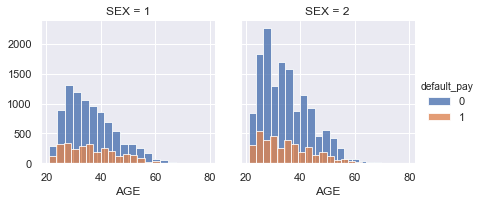

In [84]:
g = sns.FacetGrid(df, col='SEX', hue='default_pay')
g.map(mpl.hist, 'AGE',alpha=0.8,bins=20) 
g.add_legend()

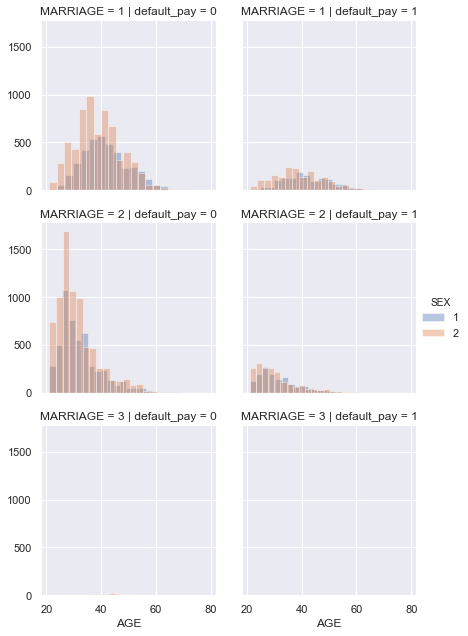

In [85]:
g = sns.FacetGrid(df, col='default_pay', row= "MARRIAGE", hue='SEX')
g.map(mpl.hist, 'AGE',alpha=0.4,bins=20) 
g.add_legend()

In [86]:
df.default_pay.describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_pay, dtype: float64

In [87]:
df.default_pay.value_counts()

0    23364
1     6636
Name: default_pay, dtype: int64

In [88]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [89]:
df["MARRIAGE"]= df["MARRIAGE"].replace(0, 3)
df["EDUCATION"]= df["EDUCATION"].replace(6, 5)
df["EDUCATION"]= df["EDUCATION"].replace(0, 5)

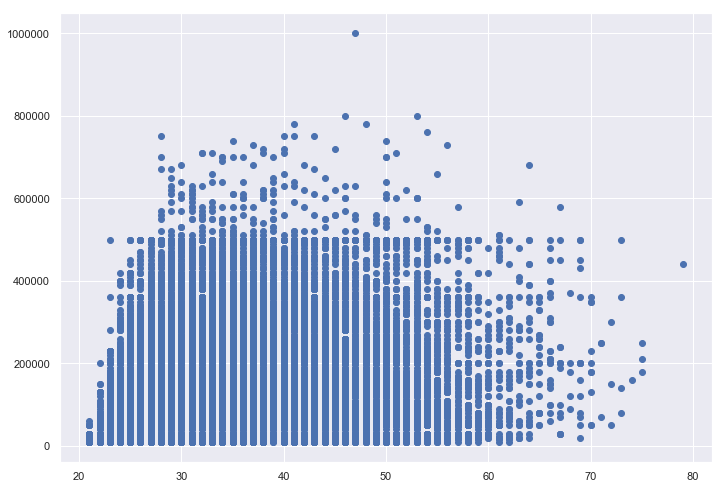

In [91]:
mpl.scatter(df.loc[:,'AGE'],df.loc[:,'LIMIT_BAL'])

# III. Method


Binary classification problem states that given a set elements, we have to classify them into two groups and predict which element belongs to which group using certain predicion policies.<br>
The probability of predicting a sample correctly should be higher than prediciting the sample incorrectly. That means,for the sample x,  P(T=+1∣x)>P(T=−1∣x).<br>
For this we have implemented four different algorithms on our dataset.<br><br>

1)<u> The pocket algorithm </u> is an increment over the perceptron algorithm. Basically, pocket algorithm is a perceptron algorithm which stores the memory of iteration. The pocket algorithm puts the best result in its pocket thus reducing the risk of misclassification. <br> If the current weights are not accuracte, replace the weights with new weights and run the algorithm once again. At the end of training, this algorithm stores the best weight in its pocket (memory) and is further used.
<br>
<br>
2)<u> Quadratic Discriminant Analysis (QDA) </u> is closely related to LDA, wherein we assume that each class has a covariance matrix. The discriminant term is quadratic and will contain second order terms. We just find a class which maximize the quadratic discriminant function. LDA and QDA are closely related except QDA computes same sigma for all the classes.
<br>
<br>
3)<u> Linear Discriminant Analysis (LDA) </u> is a method used in machine learning that characterizes two or more classes to find combination of features. It avoids overfitting and reduces computational cost. It is simple, robust and produces accuracies as good as some of the complex algorithms. LDA and QDA are closely related except LDA computes same mu for all the classes.
<br>
<br>
4)<u> Logistic Regression </u> is a kind of classification where two or independant variables (called as predictors) determine the target variable. The target is still a binary value. The probabilities of the values can vary between 0 and 1 
<br>


### A. Super Classs Definition

#### <u>Normalization : What it is and Why we use it <u>
Normalization, also called as feature scaling is used to used to standardize the range of independent variables or features of data. <br>
As the range of data differs widely, some functions won't work with it. Reason why we apply normalization is to bring down these values to a definite range and help achieve the convergence faster. We have used a variable called 'Xstnd' as the normalized X.

In [92]:
import numpy as np
from abc import ABC,abstractmethod
from copy import deepcopy as copy
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score



# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xstnd = (X-self.meanX) / self.stdX
        return Xstnd

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def dataSplit(self,X,T,ratio=[0.8,0.2]):
        assert(np.sum(ratio) == 1)
    
        idxs = np.random.permutation(X.index)
        N = X.shape[0]
    
        Xdash = []
        Tdash = []
    
        i = 0
        for j, r in enumerate(ratio):
            rows = int(round(N * r))
            if j == len(ratio) -1:
                Xdash.append(X.iloc[i:, :])
                Tdash.append(T.iloc[i:, :])        
            else:
                Xdash.append(X.iloc[i:i+rows, :])
                Tdash.append(T.iloc[i:i+rows, :])
        
            i+= rows
    
        return Xdash, Tdash
    
    
    def confusion_matrix(self,Y, T):
        
        if len(Y) != len(T):
            raise ValueError("Wrong prediction and target length!")
    
        classes = np.unique(T)
        n_classes = len(classes)

        cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)

        Tidx = [T == c for c in classes]
        for c in classes:
            pred_idx = Y == c
            cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]

        return cfm

    def precision(self,cfm):
        return cfm[1][1]/(cfm.sum(axis=1)[1])
    
    def recall(self,cfm):
        return cfm[1][1]/(cfm.sum(axis=0)[1])
    
    def specificity(self,cfm):
        return cfm[-1][-1]/(cfm.sum(axis=0)[-1])
    
    def f1(self,cfm):
        return 2 * ((self.precision(cfm) * self.recall(cfm)) / (self.precision(cfm) + self.recall(cfm)))
    
    def roc_curve(self,Y,T):
        fpr, tpr, thresholds = metrics.roc_curve(Y,T, pos_label=None)
        mpl.plot(fpr, tpr,linewidth=2, label= None)
        mpl.xlabel('FP RATE')
        mpl.ylabel('TP RATE')
        mpl.xlim(0,1)
        mpl.ylim(0,1)
        mpl.show()
    
    def auc(self,Y,T):
        return roc_auc_score(Y,T)
    
    def evaluation_metrics(self,Y,T):
        cfm = self.confusion_matrix(Y,T)
        print(pd.DataFrame([['TN','FN'],['FP','TP']],index=["-","+"],columns=["-","+"]))
        print(cfm)
        result = [self.precision(cfm),self.recall(cfm),self.specificity(cfm),self.f1(cfm),self.auc(Y,T)]
        print(pd.DataFrame(result,index=["Precision","Recall","Specificity","F1 Score","Area under the curve"],columns=["Result"]))
        self.roc_curve(Y,T)
        return result
    

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 
    

In the above code, we have also added evaluation metrics functions so that they can be called in the respective classes of algorithms further down the assignment. Metrics such as confusion matrix, precision, recall, F1 score, specificity, ROC curve, area under the curve have been coded to make it easy to implement them further. Also it is worth noticing that the confusion matrix function will throw an error if the target length does not match the predictor length i.e if Y and T do not match 

#### <u> The Pocket Algorithm :</u> 
Pocket algorithm is just perceptron algorithm with memory. As mentioned earlier, the pocket algorithm will learn from the updates in the weights. <br>
It will update the weights as it combs through the dataset and will find the best possible weight in each iteration. The weights are updated using following formula : <br>
$$
wv^{(k+1)} = wv^{(k)} + alpha t_i xv_i
$$
<br>
What this algorithm does is, it will update the weights by comparing them with the previous weights. If newly updated weights are a better fit, it will store them. Else the old weights are kept stored. This storage of weights distinguishes it from the perceptron where we can say that the best weight is stored in the 'pocket'.<br>
#### <u> Implementation: </u>
The class pocketalgo contains compare, train and use functions. Alpha is the learning rate with which it will decide the steps to learn to update the weights whereas wp is the newly updated weights after considering the iterations.<br>
Train method : Will calculate the weights by iterating through all the data and update the weights using the weight formula given above. This will create a weight matrix which will be compared with the previous iteration weights and then the best fit weight will be passed on to the next iteration. Best weight is then stored in the 'pocket' variable we are calling 'wp'.<br>
Use method : Once the comparison is done and we have updated the weights for the best weight, we apply the use function where it is applied on the data for classifying. Here, application of weights is mathematically termed as taking the dot product of the wp and input data.


### B. Pocket Algorithm


In [93]:
from copy import deepcopy as copy
class pocketalgo(Classifier):
    
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.alpha = alpha
        self.w_pocket = None

    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):
        maxiter = 50
        X = self.normalize(X)
        N = X.shape[0]
        
        w = np.zeros(X.shape[1])
        self.wp = copy(w)
        #plt.plot(T)

        for i in range(maxiter):
            converged = True
            rng = np.random.permutation(N)
            for k in rng:
                y = w@X[k]
                if np.sign(y) != np.sign(T[k]):
                    w += self.alpha * T[k] * X[k]
                    converged = False
                    if self.compare(X,T,w,self.wp) > 0:
                        self.wp[:] = w[:]
                        
            if converged:
                print("Point of convergence: ", i)
                break
            print("Training done: ", i)   

    #plt.plot(X@w)
    
    def use(self, X):
        Xstnd = (X-self.meanX)/self.stdX
        return Xstnd@self.wp

Training done:  0
Training done:  1
Training done:  2
Training done:  3
Training done:  4
Training done:  5
Training done:  6
Training done:  7
Training done:  8
Training done:  9
Training done:  10
Training done:  11
Training done:  12
Training done:  13
Training done:  14
Training done:  15
Training done:  16
Training done:  17
Training done:  18
Training done:  19
Training done:  20
Training done:  21
Training done:  22
Training done:  23
Training done:  24
Training done:  25
Training done:  26
Training done:  27
Training done:  28
Training done:  29
Training done:  30
Training done:  31
Training done:  32
Training done:  33
Training done:  34
Training done:  35
Training done:  36
Training done:  37
Training done:  38
Training done:  39
Training done:  40
Training done:  41
Training done:  42
Training done:  43
Training done:  44
Training done:  45
Training done:  46
Training done:  47
Training done:  48
Training done:  49
Training done:  0
Training done:  1
Training done:  2
Traini

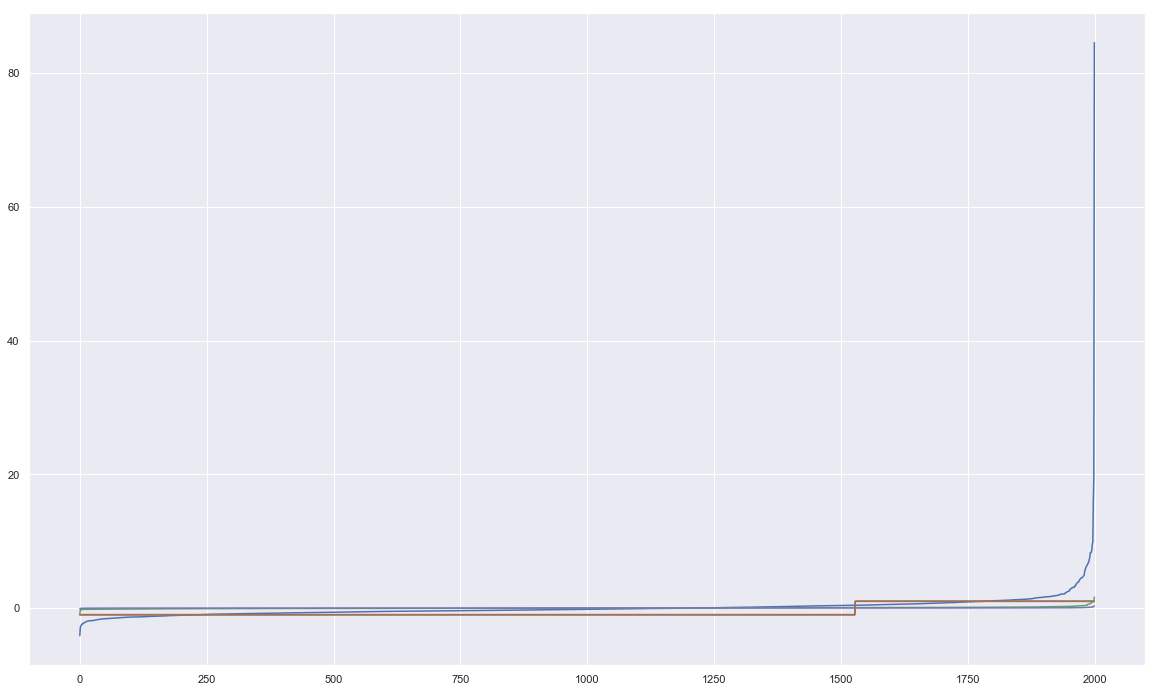

In [94]:
mpl.rcParams['figure.figsize'] = 20,12

for i in [0.1,0.01,0.001]:
    pckt = pocketalgo(i)
    X = df.iloc[:,:-1].values
    T = df.loc[:,'default_pay'].values
    T = np.where(T == 0,-1,1)
    
    X_train, X_test, T_train, T_test = train_test_split(X, T, test_size = 0.7, random_state = 43)
    
    pckt.train(X_train[:8000],T_train[:8000])
    Y = pckt.use(X_test[:2000])
    mpl.plot(np.sort(Y,0))
    mpl.plot(np.sort(T_test[:2000],0))

#### Observations :
Blue plot and colored plots except for the green sign function indicate the output of our training model for different values of alpha. Blue plot represents plot for alpha = 0.1 , red for 0.01 and purple for 0.001
The green line is the actual required output function which is the sign function ranging from -1 to 1.
The signum function switches value at 0 hence the values  to the left of transition belong to the class where no deposit is made  while the ones to the right represent the positive outcome or the condition where bank deposits were actually made.

    -   +
-  TN  FN
+  FP  TP
      -1    1
-1  1049  228
 1   479  244
                        Result
Precision             0.337483
Recall                0.516949
Specificity           0.686518
F1 Score              0.408368
Area under the curve  0.579470


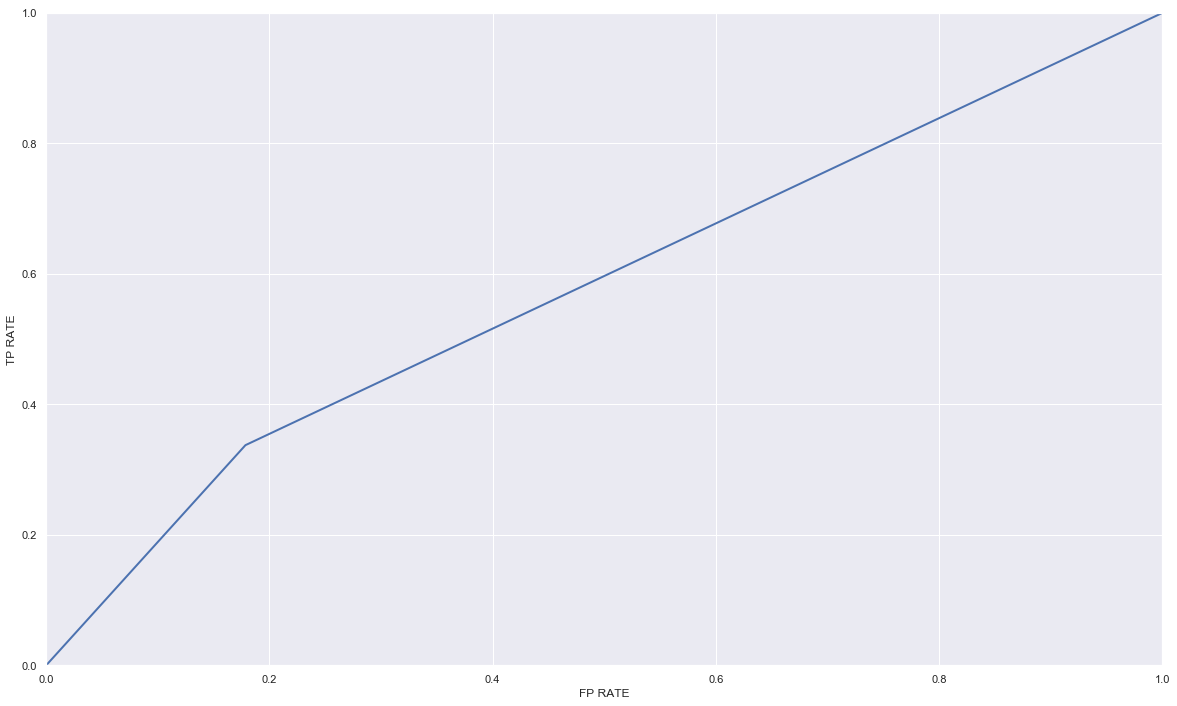

In [95]:
Y = np.where(Y > 0,1,-1)
result = pckt.evaluation_metrics(Y, np.squeeze(np.asarray(T_test[:2000])))

### C. QDA

The Quadratic Discriminant Analysis or QDA. It works on Bayes algorithm which calculates priori probability and then calculates the function to maximize the probability of placing it in the appropriate class. As mentioned earlier QDA keeps the sigma function same for all the classes and has a quadratic discriminant.

#### <u>Implementation : </u>
The class QDA inherits the base class just as the pocket algorithm does. 
Sigma, Mu is added in the train function after which the normalization function from the base class has been called.

<u>Train </u>: In the train function, first we calculate the number of classes and then using Bayes rule we take the priori probabilities. We have then calculated the mean and sigma for each of the classes by creating a new sigma variable. The values of the mu and sigma which we have just calculated are then passed to the function so that further implementation can be continued.
<br>
<u>Use</u> : After normalizing X in the use function, we implement our use function since we have already calculated the values of mu, sigma and priori probabilities. 

In [96]:
class QDA(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)

    def train(self, X, T):
        self.prior = []
        self.mu =[]
        self.sigma = []

        X = self.normalize(X)

        Tot = X.shape[0]
        self.N = np.unique(T).shape[0]
        for i in range(self.N):
            self.prior.append(copy((T == np.unique(T[i])).sum()/Tot))
            cnt = np.in1d(T, np.unique(T[i]))
            if cnt.any():
                mu_1 = X[cnt].mean(0)
                self.mu.append(copy(mu_1))
                sigma_1 = np.cov(X[cnt].T)
                self.sigma.append(copy(sigma_1))
        pass
              
    def use(self, X):
        self.d =[]
        Xstnd = (X - self.meanX)/self.stdX
        for j in range(self.N):
            D = Xstnd.shape[1]
            dSigma = self.sigma[j] if D == 1 else np.log(np.linalg.det(self.sigma[j]))
            diffrnc = Xstnd - self.mu[j].T
            sigma_ = 1.0/self.sigma[j] if D == 1 else np.linalg.inv(self.sigma[j])
            self.d.append(-0.5 * dSigma - 0.5 * np.sum(np.dot(diffrnc,sigma_) * diffrnc, axis=1) + np.log(self.prior[j]))
            return self.d
        pass

IndexError: list index out of range

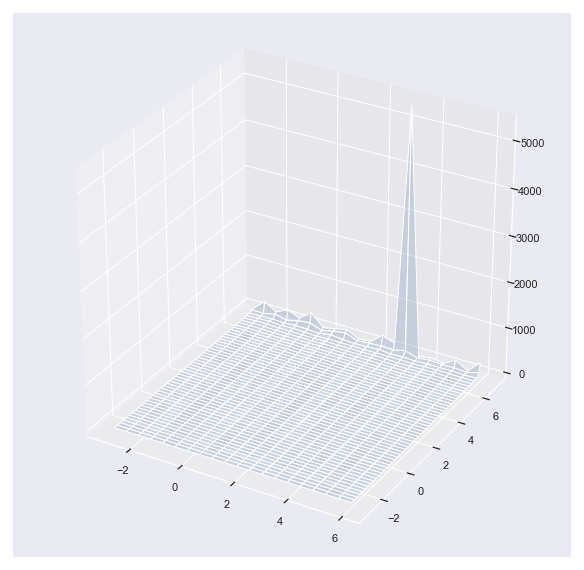

In [97]:
from mpl_toolkits.mplot3d import Axes3D

qual=QDA()
qual.train(X_train[:8000],T_train[:8000])
d=qual.use(X_test[:2000])
D=np.argmax(d,axis=0)



xs,ys=np.meshgrid(np.linspace(-3,6,20),np.linspace(-3,7,100))
fig=mpl.figure(figsize=(10,10))
ax=fig.gca(projection='3d')
ax.plot_surface(xs,ys,np.sort(-1 *d[0].reshape(xs.shape),0),alpha=0.2)
ax.plot_surface(xs,ys,np.sort(-1 *d[1].reshape(xs.shape),0),alpha=0.4)
mpl.title("QDA Function Plot")

mpl.figure(figsize=(8,8))
mpl.contourf(xs,ys,(np.sort(d[0]-d[1],0) > 0).reshape(xs.shape))
mpl.title("Boundry Graph")
mpl.figure(figsize=(8,8))
ax=fig.gca(projection='3d')

prb1=np.exp(np.sort(d[0].reshape(xs.shape),0) - 0.5*X_train.shape[1]*np.log(2*np.pi)-np.log(Qda.prior[0]))
prb2=np.exp(np.sort(d[1].reshape(xs.shape),0) - 0.5*X_train.shape[1]*np.log(2*np.pi)-np.log(Qda.prior[1]))
ax.plot_surface(xs,ys,prb1,alpha=0.2)
ax.plot_surface(xs,ys,prb2,alpha=0.4)

mpl.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

In [98]:
result = qual.evaluation_metrics(D,np.squeeze(np.asarray(T_test[:2000])))

    -   +
-  TN  FN
+  FP  TP
    -1   1
-1   0   0
 1   0   0


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in true_divide
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in true_divide
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in true_divide


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

### D. LDA

It is actually a dimensionality reduction method.
Linear Discriminant Analysis (LDA) is a method for classifying where two classes are completely linearly seperated. The input variable is a bell curve, i.e a gaussian distribution curve. Here unlike QDA, we assume that the variance of the attributes are the same.

#### Implementation :
LDA class just like QDA and pocket algorithm, inherit the base class and uses the methods of the base class. It holds the attribute of a prior probability and mu. All the other steps are regularly carried out similarly as the QDA and pocket.
Train method first normalizes the X and gets the shape in a variable called Tot. Then we calculate mu, sigma and the prior probabilities to further use in the algorithm. We calculate mean and probability by iterating through all the classes and then using those attributes.
In the use function we use the values calculated in the train function and then apply the LDA formula.

In [99]:
from copy import deepcopy as copy
class LDA(Classifier): 

    def __init__(self):
        Classifier.__init__(self)
         
    def train(self, X, T):
        self.prior = []
        self.mu =[]

        X = self.normalize(X)
        
        Tot = X.shape[0]
        self.N = np.unique(T).shape[0]
        self.sigma = np.cov(X.T)
        for i in range(self.N):
            self.prior.append(copy((T == np.unique(T[i])).sum()/Tot))
            cnt = np.in1d(T, np.unique(T[i]))
            if cnt.any():
                mu_1 = X[cnt].mean(0)
                self.mu.append(copy(mu_1))
        pass
   
    def use(self, X):
        self.d = []
        Xs = (X - self.meanX)/self.stdX
        for j in range(self.N):
            D = Xs.shape[1]
            dSigma = self.sigma if D == 1 else np.log(np.linalg.det(self.sigma))
            diffrnc = Xs - self.mu[j].T
            sigmadash = 1.0/self.sigma if D == 1 else np.linalg.inv(self.sigma)
            self.d.append(np.sum(np.dot(X, sigmadash)*self.mu[j] - 0.5 * np.dot(self.mu[j],sigmadash)*self.mu[j] + np.log(self.prior[j]), axis =1))
        return self.d
        pass

Text(0.5,1,'Decision Boundary')

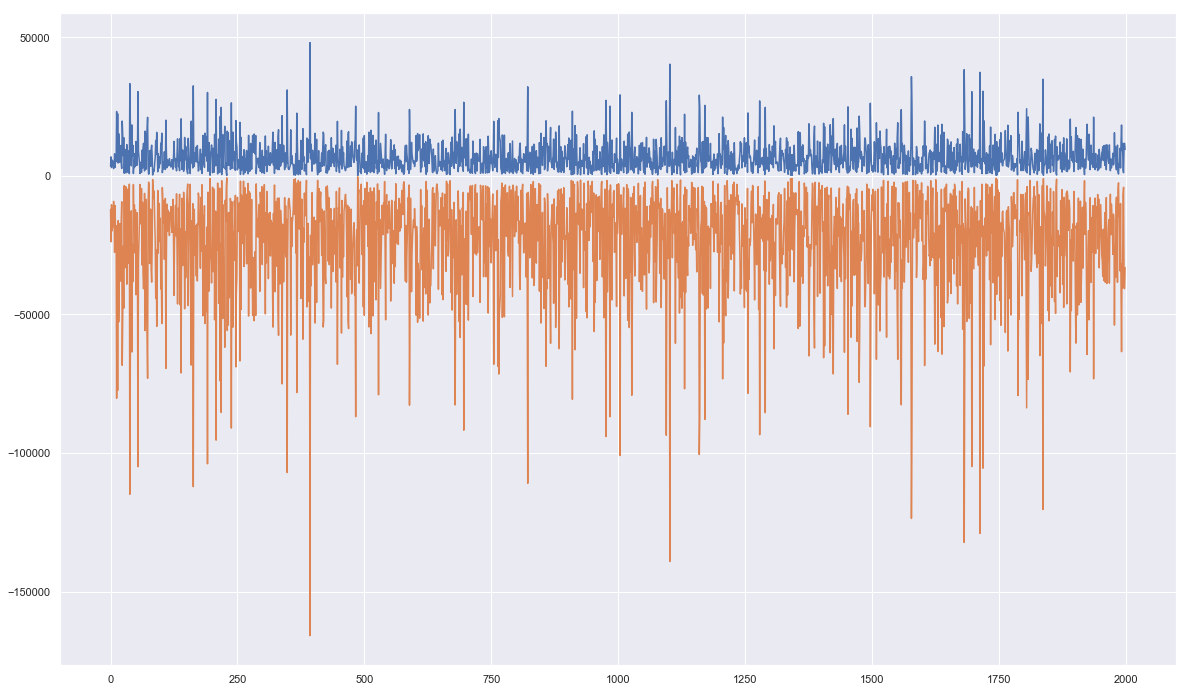

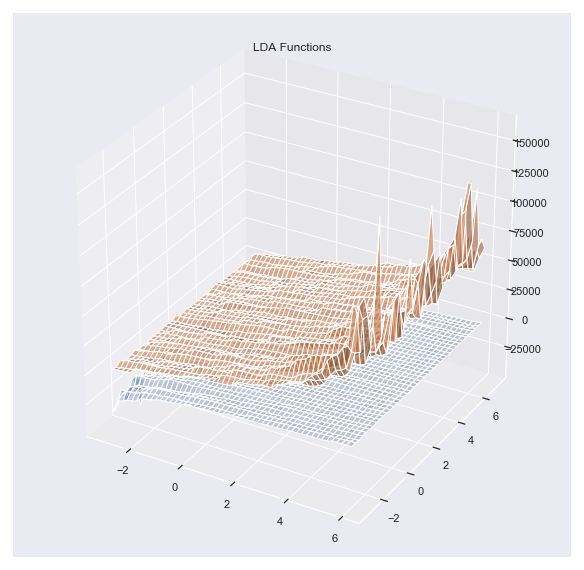

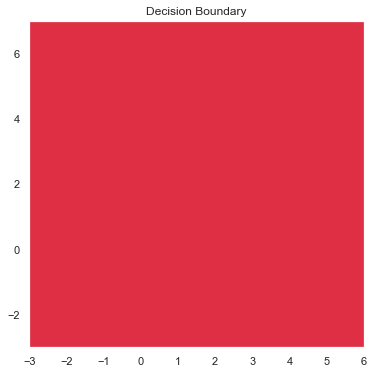

In [100]:
from mpl_toolkits.mplot3d import Axes3D
Lda = LDA()
Lda.train(X_train[:8000],T_train[:8000])

d = Lda.use(X_test[:2000])
D = np.argmax(d,axis=0)
 
mpl.plot(d[0])
mpl.plot(d[1])

xs, ys = np.meshgrid(np.linspace(-3,6, 50), np.linspace(-3,7, 40))
fig = mpl.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d[0].reshape(xs.shape)), alpha=0.3)
ax.plot_surface(xs, ys, np.sort(-1 *d[1].reshape(xs.shape)), alpha=0.6)
mpl.title("LDA Functions")

mpl.figure(figsize=(6,6))
mpl.contourf(xs, ys, (np.sort(d[0]-d[1]) > 0).reshape(xs.shape))
mpl.title("Decision Boundary")

In [101]:
met = Lda.evaluation_metrics(D, np.squeeze(np.asarray(T_test[:2000])))

    -   +
-  TN  FN
+  FP  TP
    -1   1
-1   0   0
 1   0   0


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in true_divide
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in true_divide
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in true_divide


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

### E. Logistic Regression

Here we have implemented logistic regression. Logistic regression uses multiple attributes (predictors) to produce a logistic regression curve which plots the curve from 0 to 1 and ofcourse holds a discrete values.
Logistic regression is very simple form of classification and show variety in distribution.
Logistic regression and linear regression is similar in many ways. The estimation function is continuosly estimated until the likelihood does not significantly change. The very core of the logistic regression is estimating the log odds of the event.Mathematically, logistic regression estimates a multiple linear regression.<br>
In the train method, we use the softmax function which generalizes the logistic sigmoid fuunction and the derivatives. It also uses the g for calculating the dot product of weights and input.
In the use method, we are simply using the g function which takes the dot product of weight matrix and input matrix.

In [110]:
class logireg(Classifier):
    
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.alpha = alpha
        self.w_pocket = None
        
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X,w):
        return self.softmax(X @ w)
    
    def train(self,X,T):
        X = self.normalize(X)
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        
        self.w = np.random.rand(D+1, K)
        iterator = 15
        
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        
        for step in range(iterator):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys)
            
    def use(self,X):
        normX = (X - self.meanX) / self.stdX
        normX = self.add_ones(normX)
        return self.g(normX, self.w)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Accuracy:  77.14 %


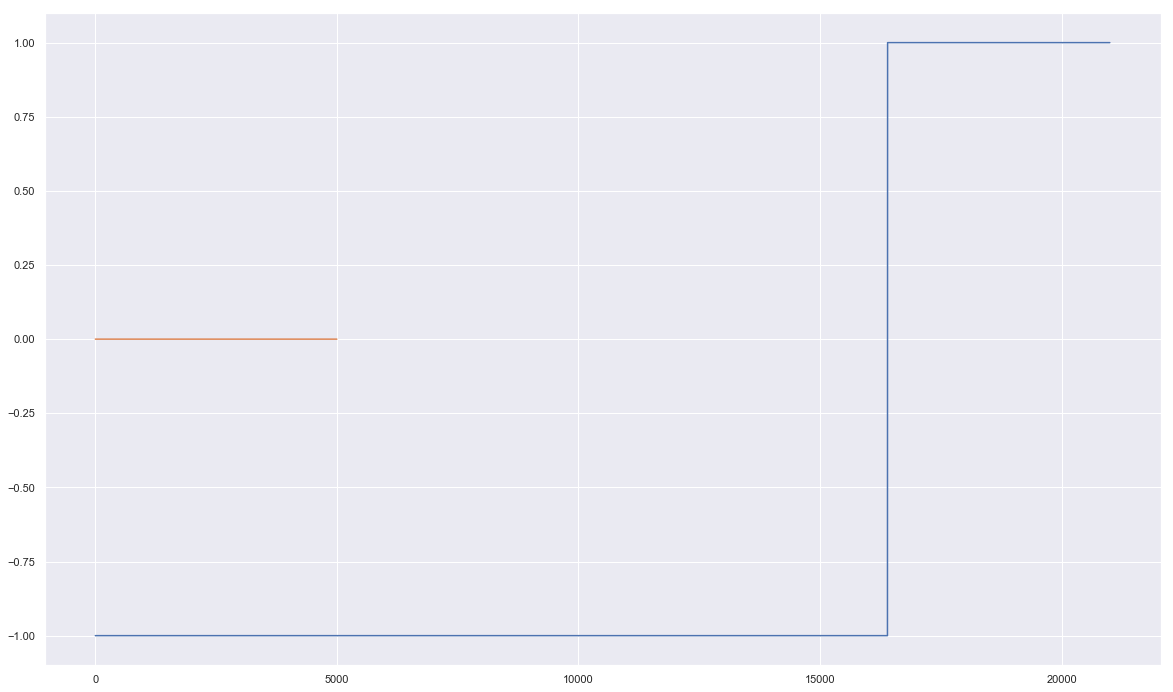

In [123]:
logreg = logireg(0.1)
logreg.train(X_train[:20000],T_train[:20000])
Y = logreg.use(X_test[:5000])

Y1 = np.argmax(Y, 1)
T1 = np.where(T_test == -1, 0, 1)
mpl.plot(np.sort(T_test,0))
mpl.plot(np.sort(Y1,0))


print("Accuracy: ", 100 - np.mean(np.abs(T1[:5000] - Y1)) * 100, "%")

In [124]:
met = logreg.evaluation_metrics(Y1,np.squeeze(np.asarray(T_test[:5000])))

    -   +
-  TN  FN
+  FP  TP
    -1   1
-1   0   0
 1   0   0


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in true_divide
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in true_divide
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in true_divide


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

Text(0.5,1,'Decision Boundary')

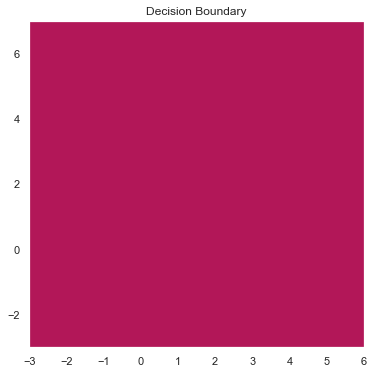

In [125]:
x = np.linspace(-3,6,50)
y = np.linspace(-3,7,100)

xs,ys = np.meshgrid(x,y)

X = np.vstack((xs.flat,ys.flat)).T
X1 = np.hstack((np.ones((X.shape[0],1)),X))

X1dash = logreg.add_ones(X_test[:5000])
Y = logreg.g(X1dash,logreg.w)
zs = np.argmax(Y,1)

mpl.figure(figsize=(6,6))
mpl.contourf(xs, ys, np.sort(Y1.reshape(xs.shape)))
mpl.title("Decision Boundary")



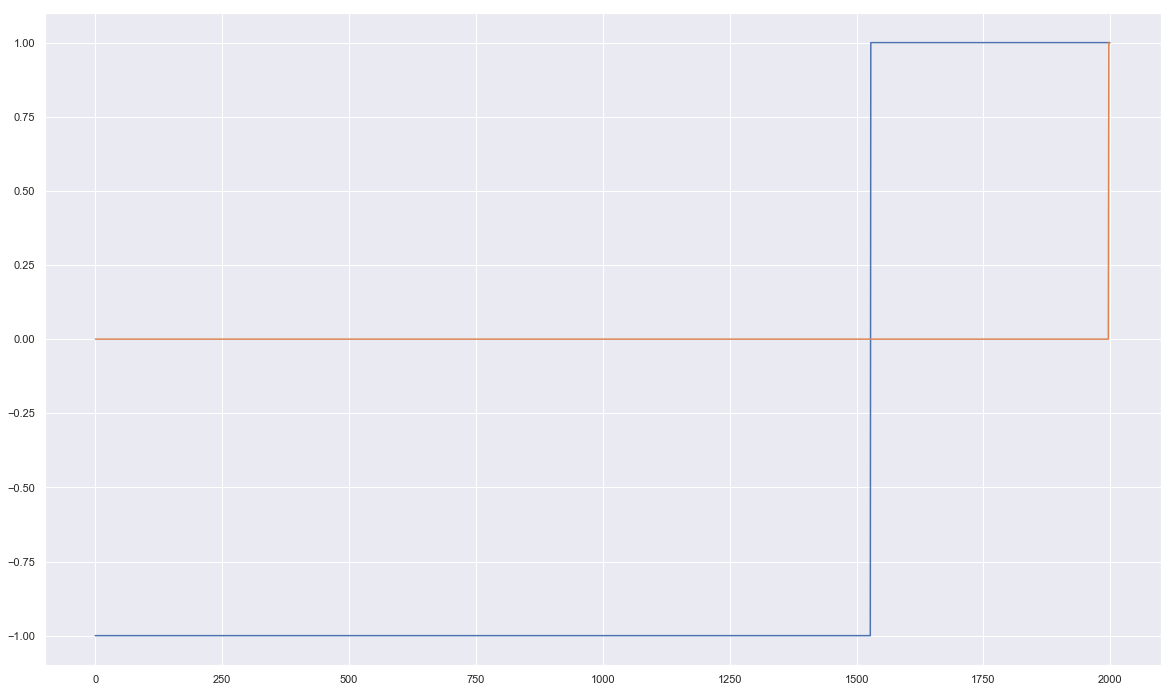

In [131]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train[:8000],T_train[:8000])
lrg = logreg1.predict_proba(X_test[:2000])
Y1=np.argmax(lrg,1)
T1=np.where(T_test==-1,0,1)
mpl.plot(np.sort(T_test[:2000],0))
mpl.plot(np.sort(Y1,0))

#print("Accuracy: ", 100 - np.mean(np.abs(Tl[:2000] - Yl)) * 100, "%")

# IV. Experiments

The experiments related to their respective models have been done in their respective section.
Additionally, we have also performed logistic regression using the scikit-learn library for validating the correctness of the output graph. It turns out that sklearn gave an accuracy lesser than the traditional application by 0.64 points.

## Comparison of algorithms
As LDA makes more restrictive gaussian assumptions, it will work better than logistic models if the requirements are met. That being said, logistic regression is more preferred as it is more exigent or robust whereas LDA can classify better than logistic regression if the requirements are met.
As QDA takes quadratic boundries, it can model wider range than the linear methods.In such conditions, QDA would perform better in the presence of controlled or limited number of training observations because it makes some assumptions about the boundry presence. 
Pocket algorithm will work better where a linear classifier is required and logistic regression cannot be used. Pocket algorithm is fast as it updates the weights on the fly. 

# Conclusions

Above models are implemented in the assignment. According to the experiments, LDA and pocket algorithm would be the best to implement. That being said, LDA and QDA were the toughest to implement with some problems because of the mathematical complexity. This assignment was for sure challenging and a very big learning curve in this course because I got to learn many new things, continous reading and referral of professor's notes and reading work made it possible to get a good grip over the assignments.

# References

1. Professor's notes
2. www.kaggle.com
3. www.wikipedia.com
4. https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
5. www.docs.scipy.org
6. Book - Hands on Machine Learning by Aurelien Geron
7. Machine Learning by Andrew Ng
8. https://machinelearningmastery.com/

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 
Again, this is a **writing assignment**. Please don't forget to properly explain your codes and results using Markdown cell. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)